In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
def display_img(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [82]:
stacks = cv2.imread('PhotosLARC/oneHalfHorizontal.png')

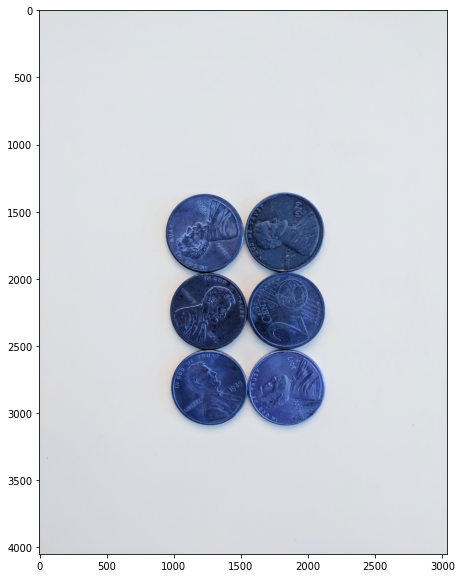

In [83]:
display_img(stacks)

In [84]:
stacks = cv2.medianBlur(stacks,35)

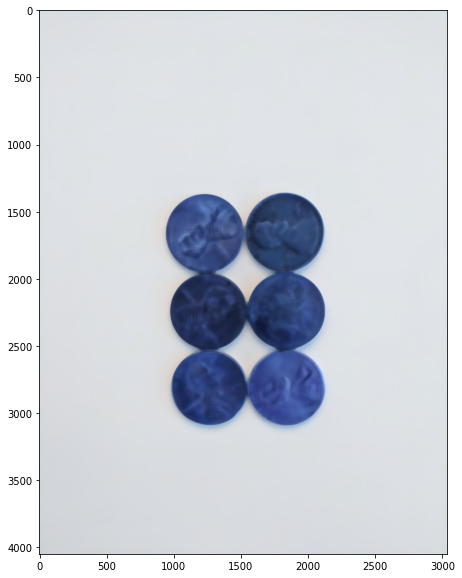

In [85]:
display_img(stacks)

In [86]:
gray = cv2.cvtColor(stacks,cv2.COLOR_BGR2GRAY)

In [87]:
# Use Otsu method for thresholding image
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

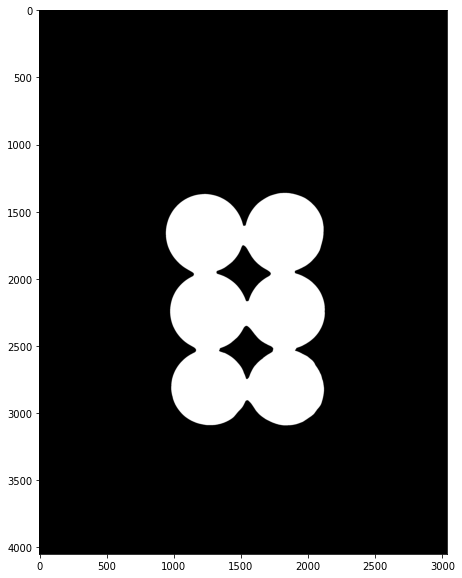

In [88]:
display_img(thresh)

In [89]:
# Apply opening method to reduce noise
kernel = np.ones((3,3),np.uint8)

In [90]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

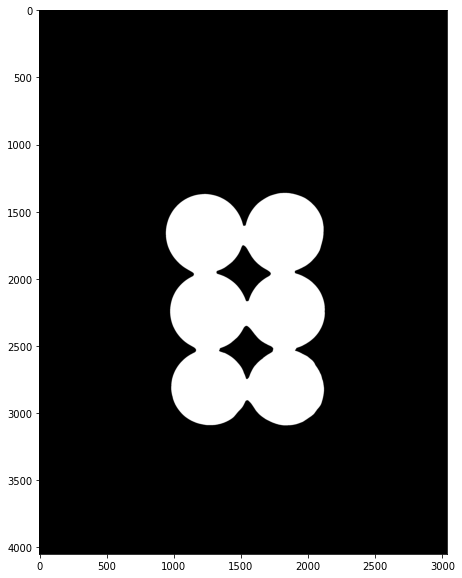

In [91]:
display_img(opening)

In [92]:
# Detecting area we are sure is part of the background
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Performing distance transform to deal with rods merging
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

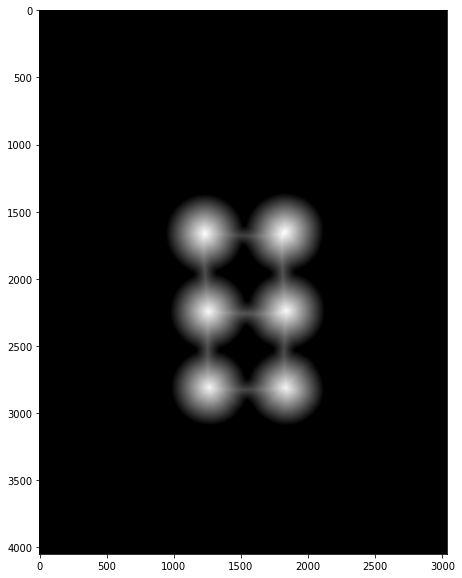

In [93]:
display_img(dist_transform)

In [94]:
# Tagging points we are sure are part of the foreground, thanks to distance transform
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

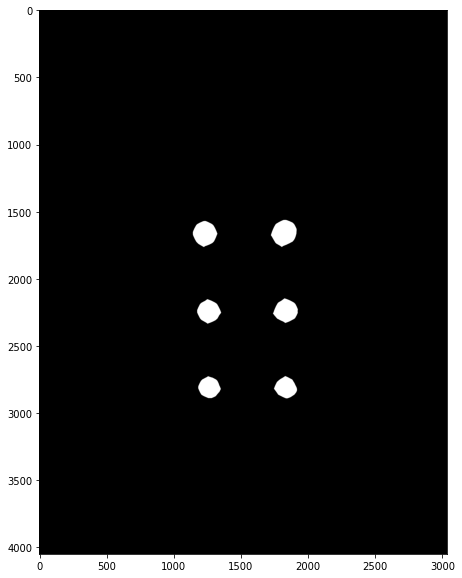

In [95]:
display_img(sure_fg)

In [96]:
# Discover unknonw regions that are missing with Watershed Algorithm

In [97]:
sure_fg = np.uint8(sure_fg)

In [98]:
unknown = cv2.subtract(sure_bg,sure_fg)

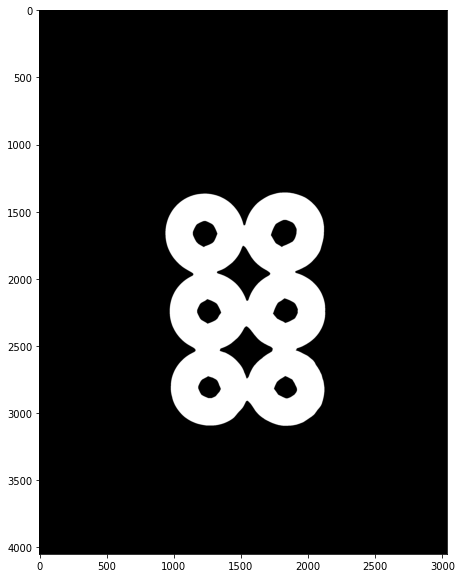

In [99]:
display_img(unknown)

In [100]:
ret, markers = cv2.connectedComponents(sure_fg)

In [101]:
markers = markers + 1

In [102]:
# Making regions to be examined black
markers[unknown==255] = 0

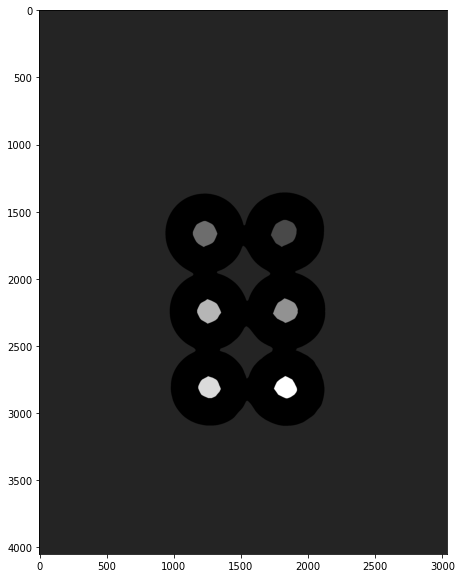

In [103]:
display_img(markers)

In [104]:
# Now that image is ready, apply Watershed Algorithm

In [105]:
markers = cv2.watershed(stacks,markers)

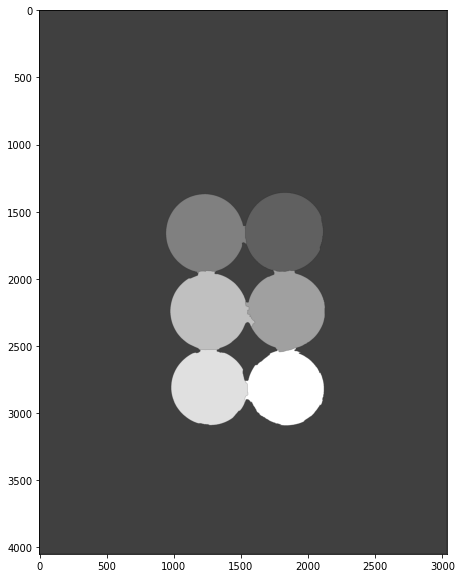

In [106]:
display_img(markers)

In [107]:
image, contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [108]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(stacks,contours,i,(255,0,0),10)

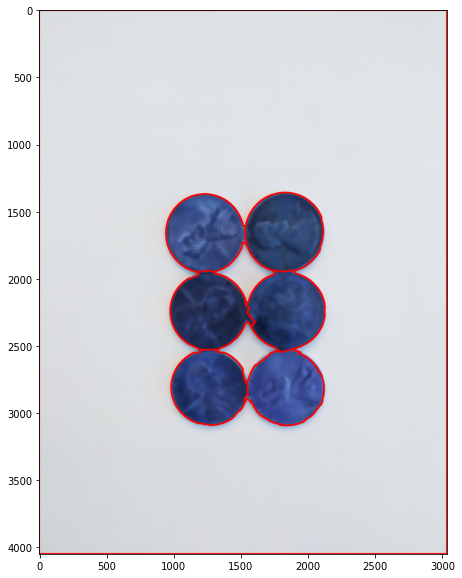

In [109]:
display_img(stacks)

In [ ]:
# Can be improved, must test blurring effects and other thresholds to improve result